In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('mushroom.csv')

In [4]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


# 1. EDA

In [8]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [10]:
#check for null values
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [12]:
df['class'].unique()

array(['poisonous', 'edible'], dtype=object)

In [14]:
target=df[['class']]

In [16]:
target

,class
0,poisonous
1,edible
2,poisonous
3,poisonous
4,poisonous
...,...
1995,poisonous
1996,poisonous
1997,poisonous
1998,poisonous


In [18]:
features=df.drop(columns='class')

In [20]:
features

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,brown,universal,brown,two,sheathing,brown,numerous,waste,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,gray,universal,yellow,two,sheathing,purple,abundant,waste,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,pink,partial,yellow,two,cobwebby,green,clustered,grasses,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,white,universal,white,none,none,yellow,clustered,urban,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,orange,partial,orange,one,flaring,purple,abundant,leaves,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,orange,partial,white,one,zone,yellow,numerous,waste,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,red,partial,brown,two,evanescent,yellow,abundant,woods,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,pink,universal,yellow,one,cobwebby,brown,solitary,woods,11.092703,8.423199


In [22]:
num_col=[i for i in features.columns if features[i].dtype!='O']
num_col

['Unnamed: 0', 'stalk_height', 'cap_diameter']

In [24]:
catg_col=[i for i in features.columns if features[i].dtype=='O']
catg_col

['cap_shape',
 'cap_surface',
 'cap_color',
 'bruises',
 'odor',
 'gill_attachment',
 'gill_spacing',
 'gill_size',
 'gill_color',
 'stalk_shape',
 'stalk_root',
 'stalk_surface_above_ring',
 'stalk_surface_below_ring',
 'stalk_color_above_ring',
 'stalk_color_below_ring',
 'veil_type',
 'veil_color',
 'ring_number',
 'ring_type',
 'spore_print_color',
 'population',
 'habitat']

In [26]:
for col in catg_col:
    print(f"Unique values in '{col}': {features[col].unique()}")

Unique values in 'cap_shape': ['sunken' 'flat' 'bell' 'convex' 'conical']
Unique values in 'cap_surface': ['scaly' 'fibrous' 'grooves' 'smooth']
Unique values in 'cap_color': ['white' 'red' 'purple' 'pink' 'yellow' 'brown' 'green' 'buff' 'gray']
Unique values in 'bruises': ['no' 'yes']
Unique values in 'odor': ['anise' 'foul' 'fishy' 'musty' 'spicy' 'none' 'pungent' 'almond'
 'creosote']
Unique values in 'gill_attachment': ['descending' 'notched' 'free' 'attached']
Unique values in 'gill_spacing': ['distant' 'crowded' 'close']
Unique values in 'gill_size': ['broad' 'narrow']
Unique values in 'gill_color': ['pink' 'chocolate' 'purple' 'orange' 'buff' 'black' 'red' 'green' 'brown'
 'yellow' 'white' 'gray']
Unique values in 'stalk_shape': ['tapering' 'enlarging']
Unique values in 'stalk_root': ['cup' 'rooted' 'club' 'missing' 'equal' 'bulbous' 'rhizomorphs']
Unique values in 'stalk_surface_above_ring': ['smooth' 'silky' 'scaly' 'fibrous']
Unique values in 'stalk_surface_below_ring': ['sil

In [28]:
features.drop(columns='Unnamed: 0',inplace=True)
features

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,brown,universal,brown,two,sheathing,brown,numerous,waste,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,gray,universal,yellow,two,sheathing,purple,abundant,waste,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,pink,partial,yellow,two,cobwebby,green,clustered,grasses,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,white,universal,white,none,none,yellow,clustered,urban,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,orange,partial,orange,one,flaring,purple,abundant,leaves,5.877891,17.464145
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,orange,partial,white,one,zone,yellow,numerous,waste,6.500840,13.501957
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,red,partial,brown,two,evanescent,yellow,abundant,woods,13.558064,11.270020
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,...,pink,universal,yellow,one,cobwebby,brown,solitary,woods,11.092703,8.423199


In [30]:
features



,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,brown,universal,brown,two,sheathing,brown,numerous,waste,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,gray,universal,yellow,two,sheathing,purple,abundant,waste,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,pink,partial,yellow,two,cobwebby,green,clustered,grasses,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,white,universal,white,none,none,yellow,clustered,urban,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,orange,partial,orange,one,flaring,purple,abundant,leaves,5.877891,17.464145
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,orange,partial,white,one,zone,yellow,numerous,waste,6.500840,13.501957
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,red,partial,brown,two,evanescent,yellow,abundant,woods,13.558064,11.270020
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,...,pink,universal,yellow,one,cobwebby,brown,solitary,woods,11.092703,8.423199


In [32]:
# correlation

<AxesSubplot:>

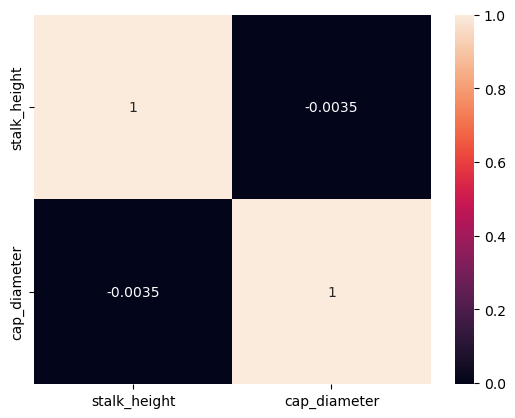

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

corr=features.corr()
sns.heatmap(corr,annot=True)


# histogram

<AxesSubplot:>

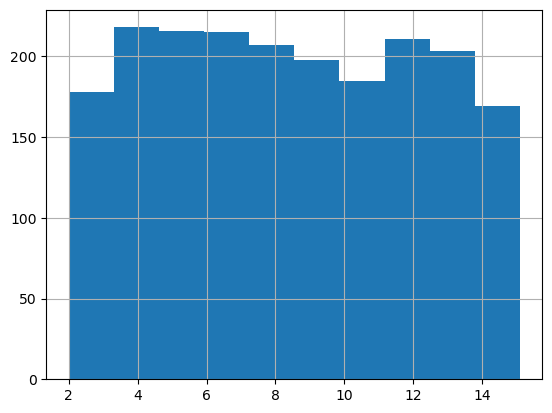

In [36]:
features['stalk_height'].hist()

<AxesSubplot:>

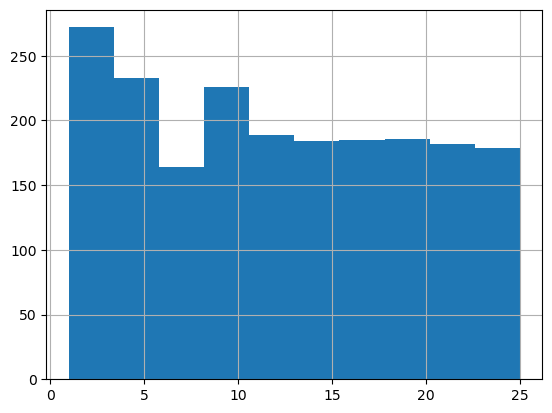

In [37]:
features['cap_diameter'].hist()

# boxplot

<AxesSubplot:xlabel='cap_color', ylabel='cap_diameter'>

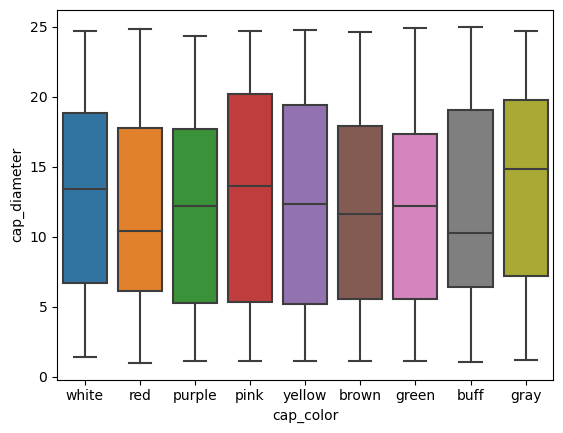

In [39]:
sns.boxplot(x='cap_color',y='cap_diameter',data=features)

<AxesSubplot:xlabel='gill_spacing', ylabel='cap_diameter'>

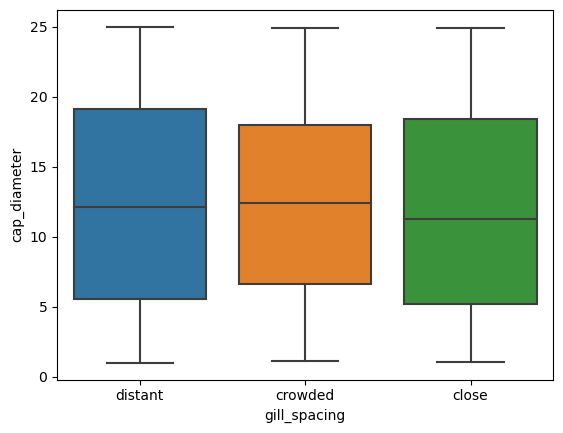

In [40]:
sns.boxplot(x='gill_spacing',y='cap_diameter',data=features)

# 

density plot

<AxesSubplot:xlabel='cap_diameter', ylabel='Density'>

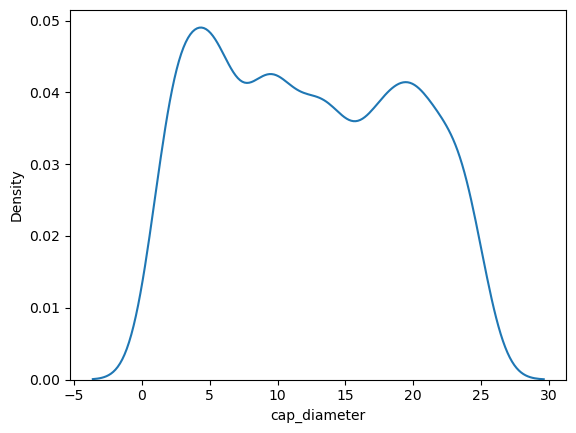

In [42]:
sns.kdeplot(data=features,x='cap_diameter')

D:\25\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cap_diameter', ylabel='Density'>

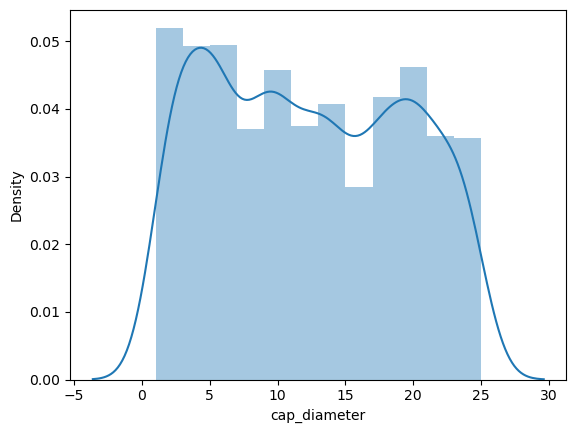

In [43]:
sns.distplot(features['cap_diameter'])

# scatter plot

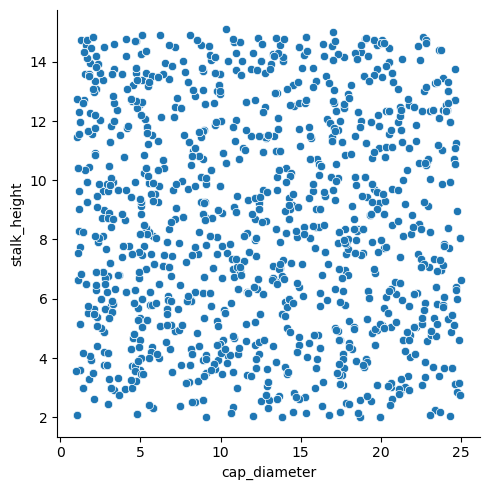

In [45]:
sns.relplot(data=features,x='cap_diameter',y='stalk_height',kind='scatter')

# count plot

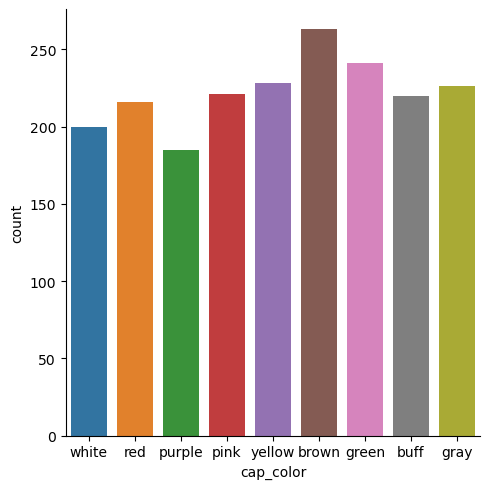

In [47]:
sns.catplot(data=features,x='cap_color',kind='count')

# bar chart

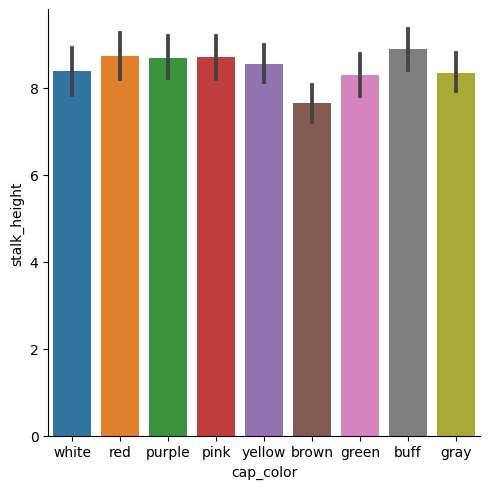

In [49]:
sns.catplot(data=features,x='cap_color',y='stalk_height',kind='bar')

# 2. Data Preprocessing


In [52]:
features

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,brown,universal,brown,two,sheathing,brown,numerous,waste,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,gray,universal,yellow,two,sheathing,purple,abundant,waste,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,pink,partial,yellow,two,cobwebby,green,clustered,grasses,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,white,universal,white,none,none,yellow,clustered,urban,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,orange,partial,orange,one,flaring,purple,abundant,leaves,5.877891,17.464145
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,orange,partial,white,one,zone,yellow,numerous,waste,6.500840,13.501957
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,red,partial,brown,two,evanescent,yellow,abundant,woods,13.558064,11.270020
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,...,pink,universal,yellow,one,cobwebby,brown,solitary,woods,11.092703,8.423199


In [55]:
print(features.columns)  # Check all column names



Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat',
       'stalk_height', 'cap_diameter'],
      dtype='object')


In [57]:
catg_col

['cap_shape',
 'cap_surface',
 'cap_color',
 'bruises',
 'odor',
 'gill_attachment',
 'gill_spacing',
 'gill_size',
 'gill_color',
 'stalk_shape',
 'stalk_root',
 'stalk_surface_above_ring',
 'stalk_surface_below_ring',
 'stalk_color_above_ring',
 'stalk_color_below_ring',
 'veil_type',
 'veil_color',
 'ring_number',
 'ring_type',
 'spore_print_color',
 'population',
 'habitat']

# Encoding categorical columns

In [61]:
#Apply one-hot encoding to all categorical columns at once and update the features dataframe
features = pd.get_dummies(features, columns=catg_col, drop_first=False)

In [70]:
features

,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,14.276173,5.054983,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,3.952715,19.068319,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,9.054265,7.205884,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,5.226499,20.932692,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,14.037532,12.545245,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5.877891,17.464145,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1996,6.500840,13.501957,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1997,13.558064,11.270020,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1998,11.092703,8.423199,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [72]:
features.columns

Index(['stalk_height', 'cap_diameter', 'cap_shape_bell', 'cap_shape_conical',
       'cap_shape_convex', 'cap_shape_flat', 'cap_shape_sunken',
       'cap_surface_fibrous', 'cap_surface_grooves', 'cap_surface_scaly',
       ...
       'population_scattered', 'population_several', 'population_solitary',
       'habitat_grasses', 'habitat_leaves', 'habitat_meadows', 'habitat_paths',
       'habitat_urban', 'habitat_waste', 'habitat_woods'],
      dtype='object', length=126)

# Scaling Numerical columns

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
std_sca=StandardScaler()

In [77]:
features[['stalk_height', 'cap_diameter']]=std_sca.fit_transform(features[['stalk_height','cap_diameter']])

In [78]:
features

,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1.576459,-1.030123,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,-1.216463,0.958407,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.163717,-0.724904,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.871852,1.222967,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1.511897,0.032765,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.695623,0.730771,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1996,-0.527090,0.168525,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1997,1.382181,-0.148193,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1998,0.715199,-0.552164,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


# split dataset into training and testing

In [84]:
target

,class
0,poisonous
1,edible
2,poisonous
3,poisonous
4,poisonous
...,...
1995,poisonous
1996,poisonous
1997,poisonous
1998,poisonous


In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=200)

In [87]:
x_train.shape

(1500, 126)

In [90]:
x_test.shape


(500, 126)

# 3. SVM IMPLMENTATION

In [93]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV


In [94]:
svc=SVC(C=1.0,kernel='poly',gamma=0.1)


In [97]:
svc.fit(x_train,y_train)
import warnings
warnings.filterwarnings('ignore')

D:\25\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [99]:
y_predict=svc.predict(x_test)
y_predict

array(['edible', 'poisonous', 'poisonous', 'edible', 'edible',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'edible', 'poisonous', 'poisonous', 'edible', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'edible', 'poisonous', 'edible', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'edible', 'edible',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'edible', 'edible', 'poisonous',
       'poisonous', 'poisonous', 'edible', 'poisonous', 'poisonous',
       'edible', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'edible', 'poisonous', 'edible', 'poisonous',
       'poisonous', 'poisonous', 'edible', 'edible', 'poisonous',
       'poisonous', 'edible', 'poisonous', 

In [101]:
accuracy_score(y_test,y_predict)

0.834

# 4. Visualization of SVM Results

In [104]:
conf=confusion_matrix(y_test,y_predict)
conf

array([[ 99,  55],
       [ 28, 318]], dtype=int64)

Text(50.722222222222214, 0.5, 'y_actual')

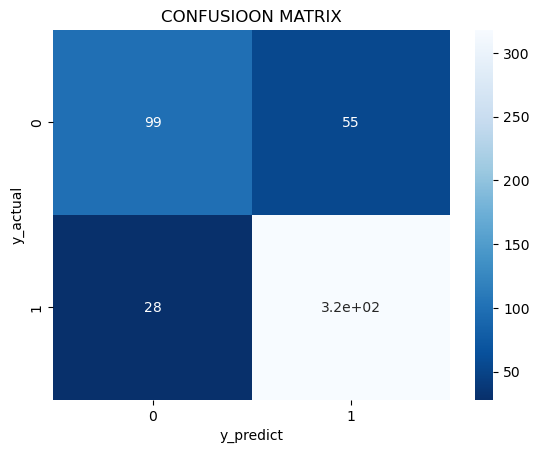

In [106]:
import seaborn as sns
sns.heatmap(conf,annot=True,cmap=plt.cm.Blues_r)
plt.title('CONFUSIOON MATRIX')
plt.xlabel('y_predict')
plt.ylabel('y_actual')
            

In [108]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

      edible       0.78      0.64      0.70       154
   poisonous       0.85      0.92      0.88       346

    accuracy                           0.83       500
   macro avg       0.82      0.78      0.79       500
weighted avg       0.83      0.83      0.83       500



# 5. Parameter Tuning and Optimization

In [111]:
params={'C':[1,2,3,4,5],'kernel':['rbf','poly','sigmoid'],'gamma':[0.1,0.2,0.3,0.4]}

In [113]:
gridsearch=GridSearchCV(svc,params)

In [115]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=SVC(gamma=0.1, kernel='poly'),
             param_grid={'C': [1, 2, 3, 4, 5], 'gamma': [0.1, 0.2, 0.3, 0.4],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

In [117]:
print(gridsearch.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
#rbf

In [119]:
svc1=SVC(C=1.0,kernel='rbf',gamma=0.1)

In [121]:
svc1.fit(x_train,y_train)

SVC(gamma=0.1)

In [123]:
y_predict=svc1.predict(x_test)

In [125]:
accuracy_score(y_test,y_predict)

0.868

In [ ]:
# sigmoid

In [143]:
svc2=SVC(C=3.0,kernel='sigmoid',gamma=0.3)

In [145]:
svc2.fit(x_train,y_train)

SVC(C=3.0, gamma=0.3, kernel='sigmoid')

In [147]:
y_predict=svc2.predict(x_test)

In [149]:
accuracy_score(y_test,y_predict)

0.548

In [151]:
#linear

In [153]:
svc3=SVC(C=2.0,kernel='linear',gamma=0.3)

In [161]:
svc3.fit(x_train,y_train)

SVC(C=2.0, gamma=0.3, kernel='linear')

In [163]:
y_predict=svc3.predict(x_test)

In [165]:
accuracy_score(y_test,y_predict)

0.708

# Comparison and Analysis

In [168]:
# for linear kernel model works with accuracy of 70.8%
# for polynomial kernel model works with accuracy of 83.4%
#for rbf kernel model works with accuracy of 86.8%
#for sigmoid kernel model works with accuracy of 54.8%

In [170]:
# model gives better result for rbf kernel

In [172]:
#1. strengths
# SVM with rbf kernel works good for non-linear data of mushroom
# By tuning hyperparameters like C and gamma,SVM avoids overfitting
#2. weaknesss
# SVM requires proper scaling of data
# gridsearch takes time to give the best hyperparameters

In [ ]:
# real world application
# 1. medical diagnosis
# 2. Image recognition
# 3.Fraud Detection
